### Moving averages
Considering that the last observation in the time series has more impact on the future rather than the first observation, in the simple moving average method, we take the average of only the last few observations to forecast the future.

- A moving average is a technique to get an overall idea of the trends in a data set
- It is an average of any subset of numbers. 
- The moving average is extremely useful for forecasting long-term trends. 
- You can calculate it for any period of time. For example, if you have sales data for a twenty-year period, you can calculate a five-year moving average, a four-year moving average, and so on. 
- Stock market analysts will often use a 50 or 200 day moving average to help them see trends in the stock market and (hopefully) forecast where the stocks are headed.

#### Simple (equally-weighted) Moving Average:
The forecast for the value of Y at time t+1 that is made at time t equals the simple average of the most recent m observations:<br>
$\hat{Y}_{t+1}$ = $\frac{Y_{t} + Y_{t-1} + ... + Y_{t-m+1}}m$

- We can capture trend , cycle using moving average method but we are loosing out on seasonality
- We can capture some seasonality if we shorten the window
- A lag is observed in peaks and troughs
- Shorter window means also more noise we allow to pass , so its a tradeoff how much seasonality we want to capture by allowig noise in a shorter window

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

### Split data into train , test
train =  df[0:120]
test  =  df[120:]

In [19]:
# Simple Moving average - 12m window
y_hat_sma = df.copy()

ma_window = 12 # 12 months window

y_hat_sma['sma_12m_forecast'] =  df.Passengers.rolling(ma_window).mean()

# all test forecast would be last forcast value of train data
y_hat_sma.iloc[len(train):, 1] = y_hat_sma.iloc[len(train)-1, 1]


In [39]:
error = test.Passengers - y_hat_sma.iloc[len(train):,1]
rmse = np.sqrt((1/len(error)) * np.sum(error**2))

mape = (100/len(error)) * np.sum(abs(error)/test.Passengers)
print(f"RMSE:{rmse}, MAPE:{mape}")

RMSE:103.33178762284786, MAPE:15.53549669176367


Text(0.5, 1.0, 'SMA - 12 month')

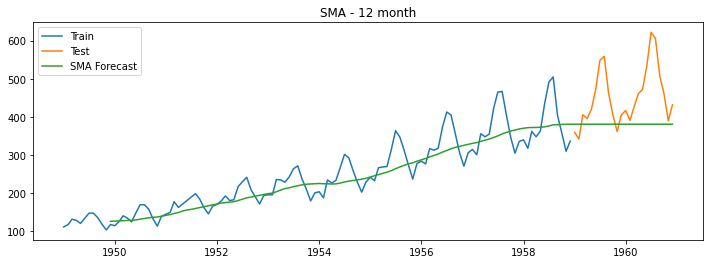

In [21]:
plt.figure(figsize=(12,4))

plt.plot(train.Passengers, label='Train')
plt.plot(test.Passengers, label='Test')
plt.plot(y_hat_sma.sma_12m_forecast, label='SMA Forecast')

plt.legend()
plt.title('SMA - 12 month')

Text(0.5, 1.0, 'SMA - 6m month')

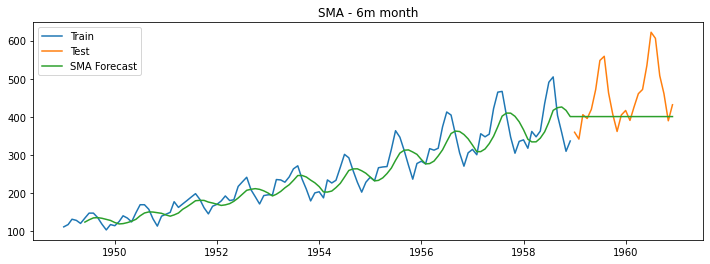

In [31]:
# Simple Moving  average - 6 m window
ma_window = 6 # 6 months window

y_hat_sma['sma_6m_forecast'] =  df.Passengers.rolling(ma_window).mean()

# all test forecast would be last forcast value of train data
y_hat_sma.iloc[len(train):, 2] = y_hat_sma.iloc[len(train)-1, 2]

plt.figure(figsize=(12,4))

plt.plot(train.Passengers, label='Train')
plt.plot(test.Passengers, label='Test')
plt.plot(y_hat_sma.sma_6m_forecast, label='SMA Forecast')

plt.legend()
plt.title('SMA - 6m month')

In [41]:
error = test.Passengers - y_hat_sma.iloc[len(train):,2]
rmse = np.sqrt((1/len(error)) * np.sum(error**2))

mape = (100/len(error)) * np.sum(abs(error)/test.Passengers)
print(f"RMSE:{rmse}, MAPE:{mape}")

RMSE:90.64100433394736, MAPE:12.967390775125203


In [42]:
# Simple Moving  average - 3 m window
ma_window = 3 # 3 months window

y_hat_sma['sma_3m_forecast'] =  df.Passengers.rolling(ma_window).mean()

# all test forecast would be last forcast value of train data
y_hat_sma.iloc[len(train):, 3] = y_hat_sma.iloc[len(train)-1, 3]

error = test.Passengers - y_hat_sma.iloc[len(train):,3]
rmse = np.sqrt((1/len(error)) * np.sum(error**2))

mape = (100/len(error)) * np.sum(abs(error)/test.Passengers)
print(f"RMSE:{rmse}, MAPE:{mape}")

RMSE:138.91379221181268, MAPE:24.010217440058238


In [43]:
# Simple Moving  average - 9 m window
ma_window = 9 # 9months window

y_hat_sma['sma_9m_forecast'] =  df.Passengers.rolling(ma_window).mean()

# all test forecast would be last forcast value of train data
y_hat_sma.iloc[len(train):, 4] = y_hat_sma.iloc[len(train)-1, 4]

error = test.Passengers - y_hat_sma.iloc[len(train):,4]
rmse = np.sqrt((1/len(error)) * np.sum(error**2))

mape = (100/len(error)) * np.sum(abs(error)/test.Passengers)
print(f"RMSE:{rmse}, MAPE:{mape}")

RMSE:94.38624840986576, MAPE:13.580336564008684
